# 🌿 OSCAR from a Jupyter Notebook: Asynchronous Service  

In this example, you will learn how to **call the Plant Classification service** that we created in the **OSCAR cluster** and retrieve its output from **MinIO storage**. 📂🌱  

🔹 Since this is an **asynchronous service**, the response will not be immediate. Instead, the processed output will be stored in MinIO.  

### 📚 Import libraries

In [1]:
from oscar_python.client import Client
from IPython.display import Image
import os

import urllib3
# Disable the SSL certificate verification warning to not distract us.
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

### 🔑 Create the client with the credentials

In [2]:
options_oidc_auth = {'cluster_id': 'cluster-id',
                     'endpoint': os.environ["OSCAR_ENDPOINT"],
                     'shortname': 'oscar-egi',
                     'ssl': 'True'}

client = Client(options=options_oidc_auth)

### 📝 Declare Input Parameters  

In this example, we declare the **input parameters** as variables to ensure consistency and avoid errors when using them multiple times. 🔄

In [ ]:
serviceName = "plant-classification-async-test"
storageProvider = "minio.default"
remoteInputPath = "plant-classification-async-test/input"
remoteOutputPath = "plant-classification-async-test/output"

inputImagePath = "img/plant-input.jpg"

### 🌿 Execute Plant Classification (Asynchronous)  

In order to execute an **asynchronous service**, we need to **connect to its storage** (defined in FDL) and **upload our input file** to the appropriate folder. 

1️⃣ To achieve that, we **create a storage client** using the `create_storage_client()` function, providing the **service name**:  

```python
    client.create_storage_client("service_name")
```

2️⃣ Once the storage client is created, we use the `upload_file()` function to save our input in the remote storage, providing the name of the **storage provider**, the local **input image path** and the **remote input path**:

```python
    storage_client.upload_file("storage_provider","input_image_path","remote_inpu_path")
```

In [4]:
try:
    storage_client = client.create_storage_client(serviceName) # returns a storage object
    response = storage_client.upload_file(storageProvider,
                                           inputImagePath,
                                           remoteInputPath)
    print("Good job")
except Exception as err:
    print("Failed with: ", err)

Uploading to bucket 'plant-classification-async' with key 'input'
Good job


### ⏳ Check the Status  

Since the process is **asynchronous**, we can't be sure when it will finish. Therefore, we need to **request the list of jobs** run by the service and check their **status**. ✅  

To do this, we use the `list_jobs()` function, providing the **service name** we want to check:  

```python
    client.list_jobs("service_name")
```


In [14]:
try:
    log_list = client.list_jobs(serviceName) #Return HTTP response
    if log_list.status_code == 200:
        #Get JSON list from response
        json_log_list = log_list.json()
        #Go through all jobs
        for value in json_log_list:
            #Print job status
            print("Job:", value, ":\n", json_log_list[value], "\n")
except Exception as err:
    print("Failed with: ", err)

Job: plant-classifica-82af33f8-143c-4bbe-ba83-05b112eedd69 :
 {'status': 'Succeeded', 'creation_time': '2025-03-03T11:43:41Z', 'start_time': '2025-03-03T11:43:43Z', 'finish_time': '2025-03-03T11:44:45Z'} 

Job: plant-classifica-d0d85a51-c723-4131-881f-f27816c161c9 :
 {'status': 'Succeeded', 'creation_time': '2025-03-03T11:42:53Z', 'start_time': '2025-03-03T11:42:54Z', 'finish_time': '2025-03-03T11:43:58Z'} 



### 📂 Check the Remote Output Folder  

Once the execution is complete, we can check the **output folder** on the **remote storage** to retrieve the processed results. 🔍  

To do this, we use the `list_files_from_path()` function, providing the **storage provider** and the **remote output folder** (or any other remote folder you wish to consult).  

```python
    storage_client.list_files_from_path("storage_provider", "remote_output_path")
```

**_NOTE:_** Unlike the other requests we have seen, this one directly returns **JSON** as a response and not a HTTP. 📄

In [15]:
try:
    storage_client = client.create_storage_client(serviceName)
    response = storage_client.list_files_from_path(storageProvider, #Return JSON response
                                                    remoteOutputPath)
    for value in response["Contents"]:
        print("> " + value["Key"])
except Exception as err:
    print("Failed with: ", err)

Reading content from path: plant-classification-async/output
> output/
> output/event-file-4d1702e9-5c5f-4a75-a3a0-b5707fbb1eeb.png
> output/event-file-be5feeb1-d4f3-436f-9732-fe3c08941e78.png
> output/event-file-cf3e51ce-59dc-45d3-bfe8-4a068a81767d.png
> output/event-file-fdca8ff0-459a-4d80-b766-274b323aedff.png
> output/plant-input.jpg


### ⬇️ Download the Output  

Once the output is available in the remote storage, we can **download the processed result** to our local machine. 📥  

To do this, we use the `download_file()` function, providing the **storage provider**, **remote file path**, and the **local foder path** where we want to save the file.  

```python
    storage_client.download_file("storage_provider", "local_folder_path or name", "remote_file_path")
```

In [ ]:
try:
    storage_client = client.create_storage_client(serviceName) # returns a storage object
    response = storage_client.download_file(storageProvider,
                                            "output",
                                            remoteOutputPath+"/plant-input.jpg")
    print("Good job")
except Exception as err:
    print("Failed with: ", err)

Good job


### 🖼️ Display Output Image  

Once the output file is downloaded, we can display the processed image directly in the notebook. 📸  

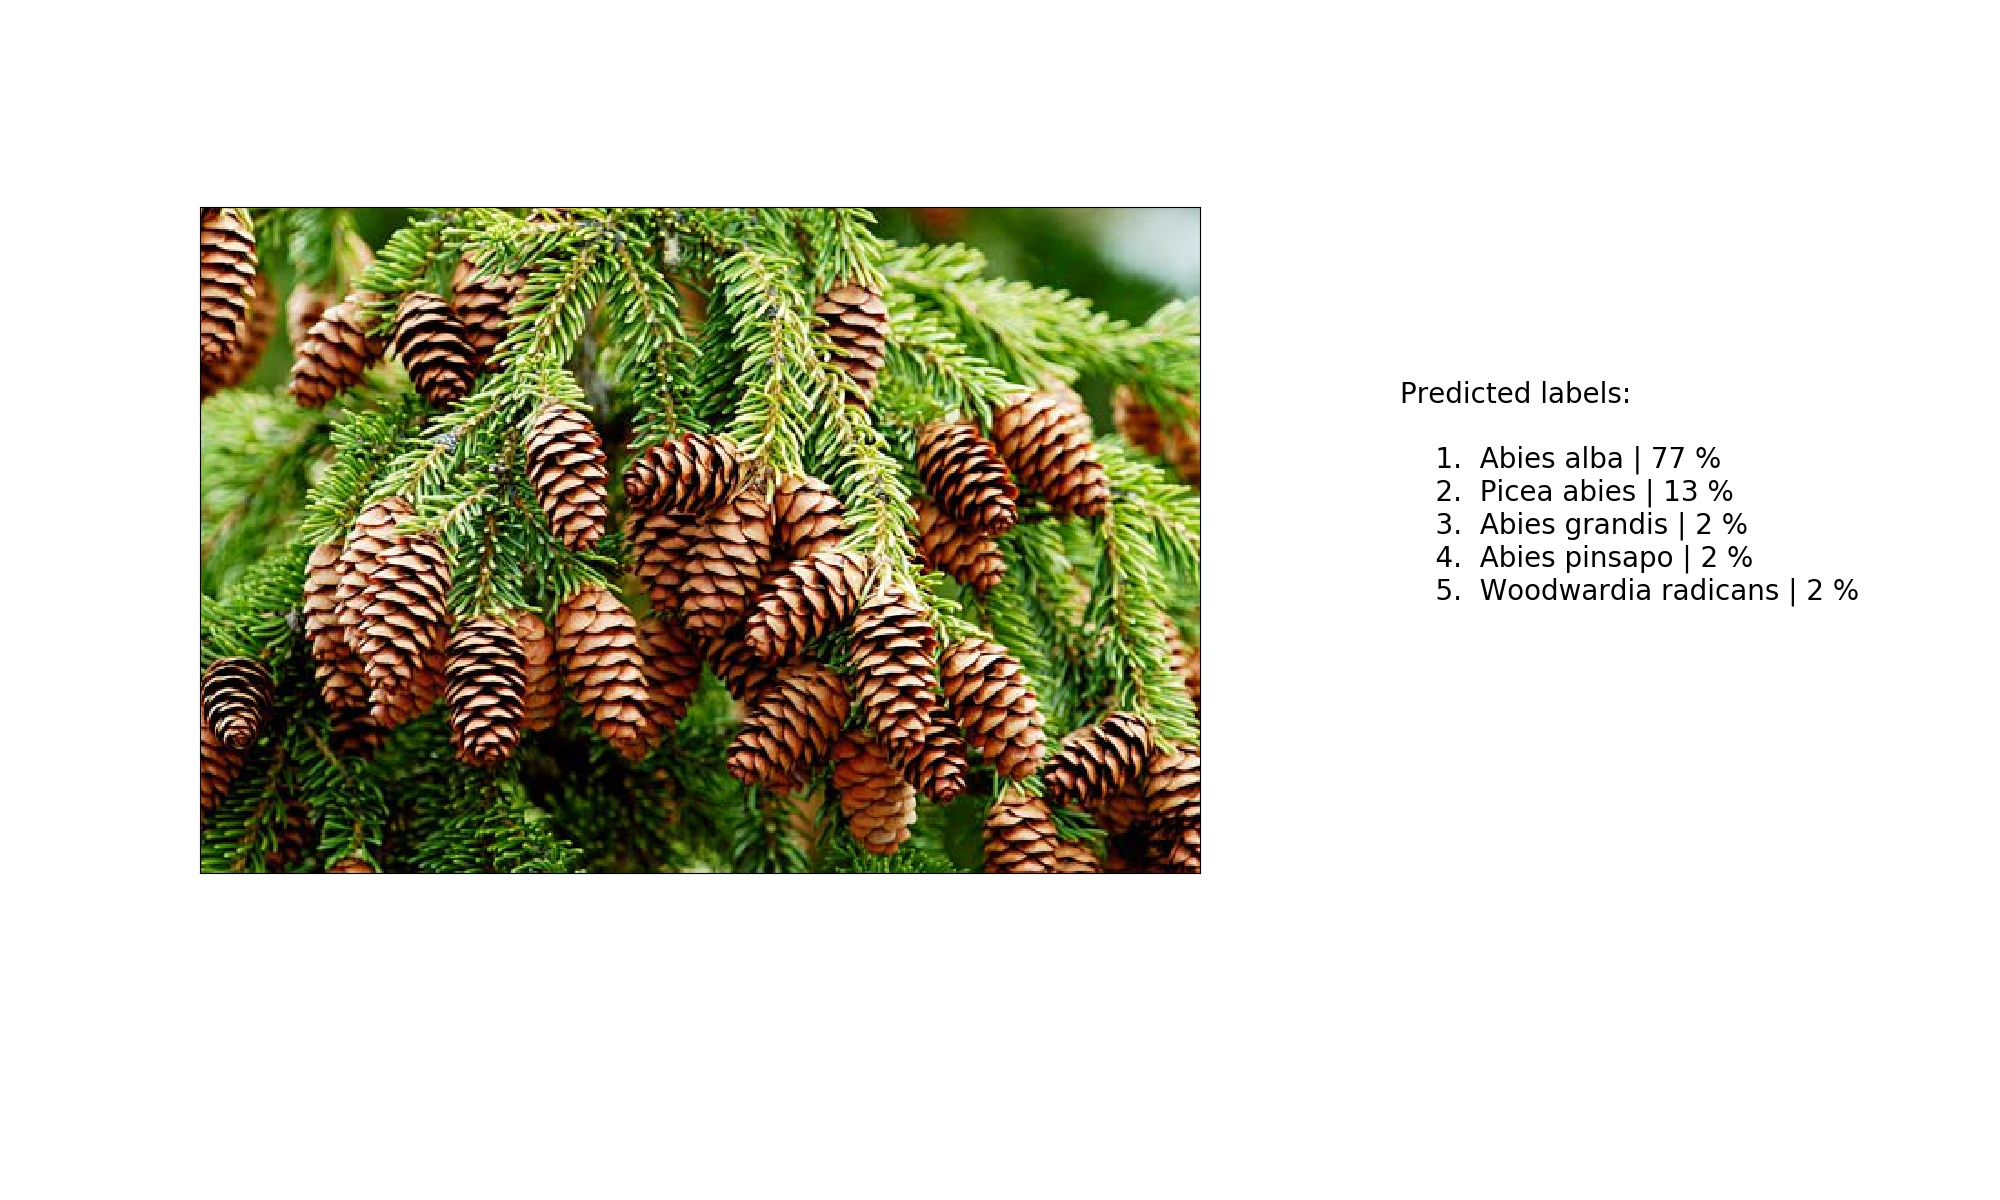

In [19]:
Image(filename='output/plant-input.jpg')